In [1]:
import re
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
df = pd.read_pickle("df.pkl")

In [6]:
scores = df[ ['date','sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound', 'sentiment_polarity', 'sentiment_subjectivity'] ]
scores.set_index('date', inplace=True)
trend = scores.resample('6H').mean()
trend

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,sentiment_polarity,sentiment_subjectivity
date,,,,,,
2020-07-24 18:00:00,0.102356,0.778807,0.118834,0.021450,0.045039,0.255395
2020-07-25 00:00:00,0.099596,0.792028,0.106996,0.001008,0.041644,0.255369
2020-07-25 06:00:00,0.081830,0.810023,0.107576,0.035763,0.050124,0.229123
2020-07-25 12:00:00,0.091478,0.798264,0.110273,0.020419,0.045688,0.246577
2020-07-25 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-29 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29 18:00:00,0.110482,0.786771,0.102748,-0.023263,0.044393,0.239160


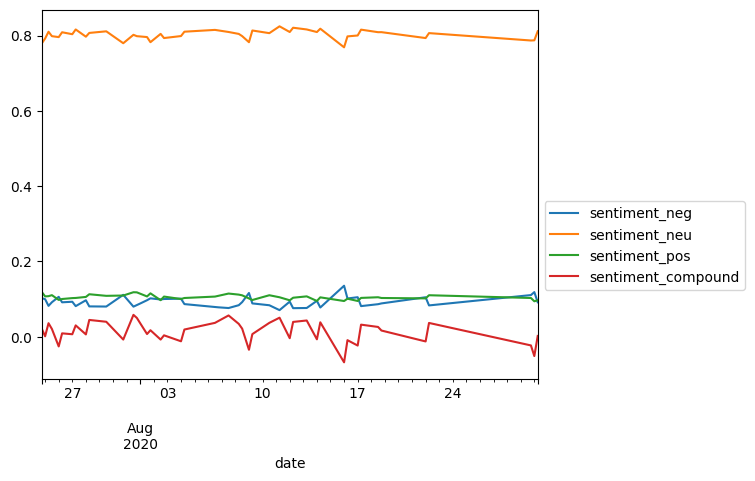

In [7]:
sentiment1 = trend[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']]
sentiment1.interpolate().plot().legend(bbox_to_anchor=(1, 0.5))

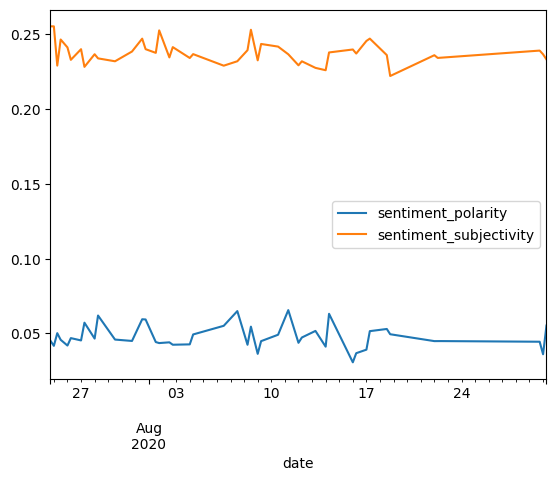

In [8]:
sentiment2 = trend[[ 'sentiment_polarity', 'sentiment_subjectivity']]
sentiment2.interpolate().plot().legend(bbox_to_anchor=(1, 0.5))

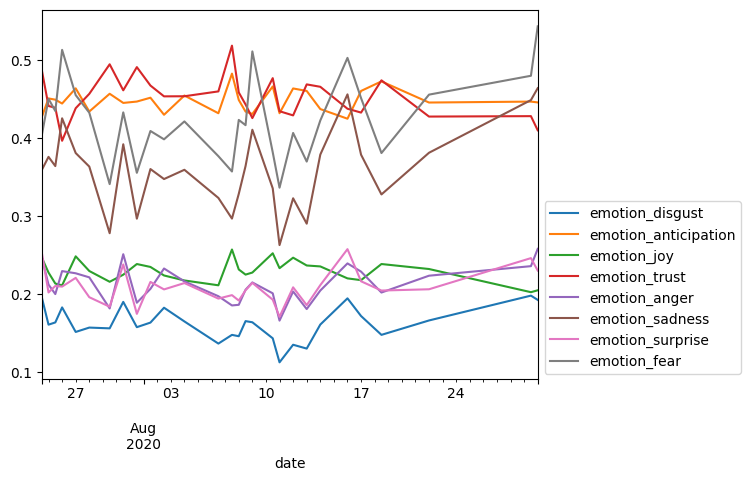

In [15]:
scores = df[['date', 'user_country','emotion_disgust','emotion_anticipation','emotion_joy','emotion_trust','emotion_anger','emotion_sadness','emotion_surprise','emotion_fear'] ]
scores.set_index('date', inplace=True)
trend = scores.resample('12H').mean()
trend.interpolate().plot().legend(bbox_to_anchor=(1, 0.5))

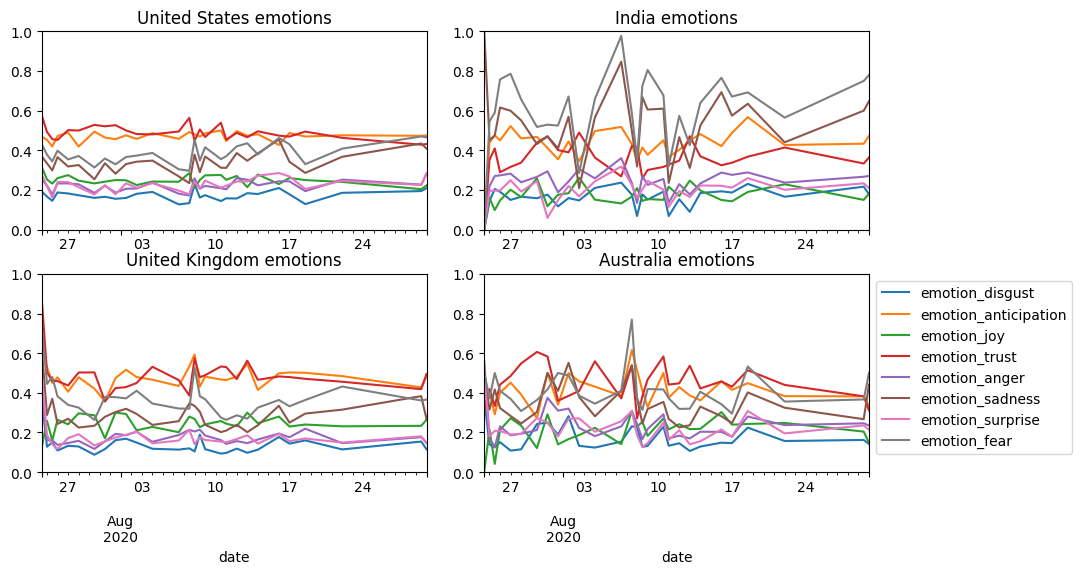

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(9,5))
fig.tight_layout()

for i, c in enumerate(['United States','India','United Kingdom','Australia']):
	country_sccore = scores[scores['user_country'] == c]
	trend = country_sccore.resample('12H').mean()
	p = trend.interpolate().plot(ax=ax.flat[i], legend=None)
	p.set_ylim([0,1])
	p.set_title(f'{c} emotions')

p.legend(bbox_to_anchor=(1, 1))

In [53]:
wc = WordCloud(random_state=0)
cv = CountVectorizer(binary=True, min_df=5)
X = cv.fit_transform(df['text'])
cv = {v: k for k, v in cv.vocabulary_.items()}

In [55]:
y = df['sentiment_polarity'] + df['sentiment_pos'] - df['sentiment_neg']
lr = LinearRegression(n_jobs=-1)
lr.fit(X, y)
lr = np.argsort(lr.coef_)

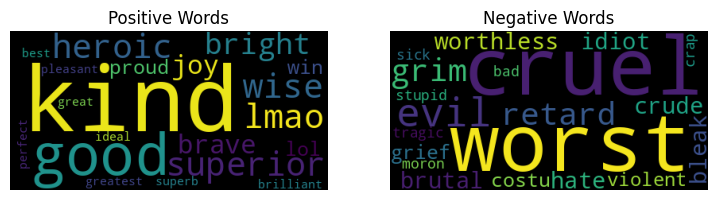

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(9,9))
ax[0].axis('off')
ax[0].set_title('Positive Words')
ax[0].imshow(wc.generate(' '.join(cv[i] for i in lr[-20:])))

ax[1].axis('off')
ax[1].set_title('Negative Words')
ax[1].imshow(wc.generate(' '.join(cv[i] for i in lr[:20])))

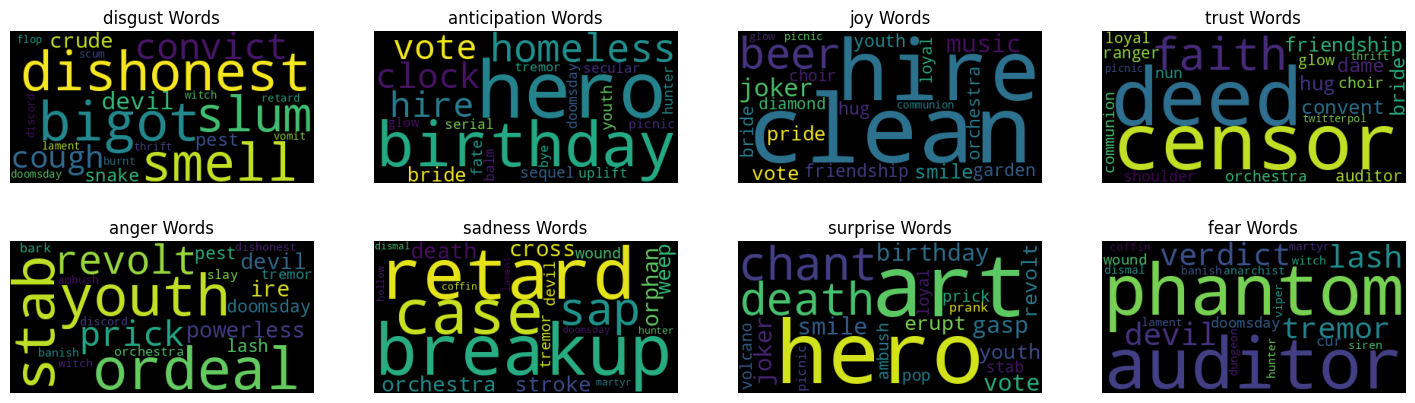

In [58]:
fig, ax = plt.subplots(2, 4, figsize=(18,5))

for i, e in enumerate(['disgust','anticipation','joy','trust','anger','sadness','surprise','fear']):

	y = df[f'emotion_{e}']
	lr = LinearRegression(n_jobs=-1)
	lr.fit(X, y)
	lr = np.argsort(lr.coef_)

	ax.flat[i].axis('off')
	ax.flat[i].set_title(f'{e} Words')
	ax.flat[i].imshow(wc.generate(' '.join(cv[i] for i in lr[-20:])))